# Problem Statement


Predict purchase amount

# About Dataset

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

# Description

The following details are available regarding the customers of retail store:

__1.User_ID:__ Unique Id of customer                         
__2.Product_ID:__ Unique Id of product                       
__3.Gender:__ Sex of customer                               
__4.Age:__ Age of customer                                  
__5.Occupation:__ Occupation code of customer               
__6.City_Category:__ City of customer                       
__7.Stay_In_Current_City_Years:__ Number of years of stay in city                                                        
__8.Marital_Status:__ Marital status of customer             
__9.Product_Category_1:__ Category of product               
__10.Product_Category_2:__ Category of product              
__11.Product_Category_3:__ Category of product              
__12.Purchase:__ Purchase amount                            

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Exploring dataset

In [3]:
# Dataset Size
df.shape

(550068, 12)

__Rows:__ 550068 ,
__Columns:__ 12


In [4]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# Checking duplicate Value
df.duplicated().sum()

0

In [7]:
# find unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x25994cf0ee0>,
 [Text(-0.785367774085001, 0.7701931312526561, 'Male'),
  Text(0.7853677019743126, -0.7701932047840901, 'Female')],
 [Text(-0.42838242222818235, 0.42010534431963054, '75.3%'),
  Text(0.42838238289507957, -0.42010538442768547, '24.7%')])

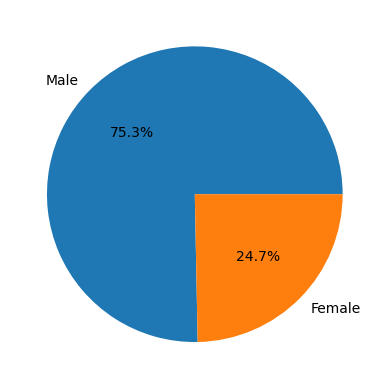

In [8]:
# Percentage of Male and Female
plt.pie(df['Gender'].value_counts(),labels=["Male","Female"],autopct="%1.1f%%")

<Axes: xlabel='Age', ylabel='count'>

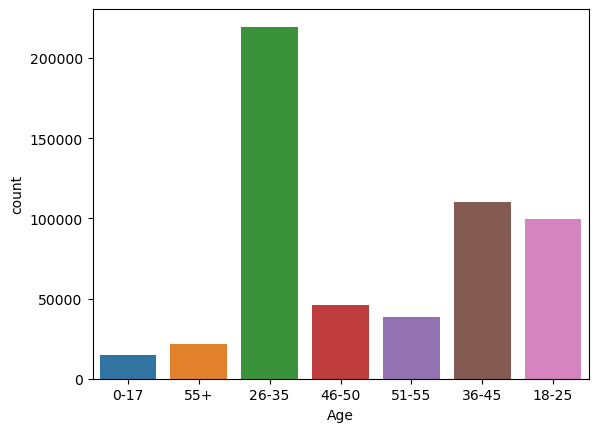

In [9]:
sns.countplot(x="Age",data=df)

<Axes: xlabel='Occupation', ylabel='count'>

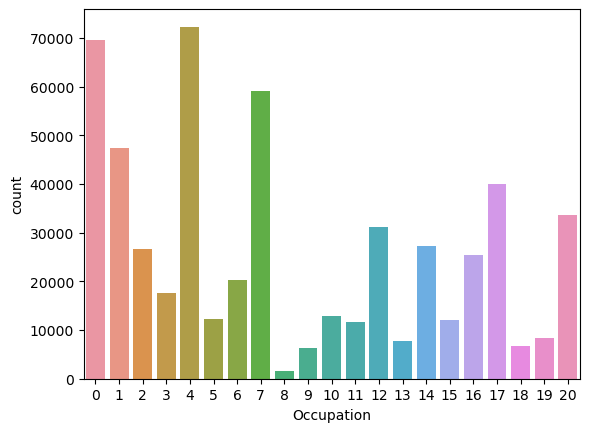

In [10]:
# Count of Occupation
sns.countplot(x="Occupation",data=df)

<Axes: xlabel='City_Category', ylabel='count'>

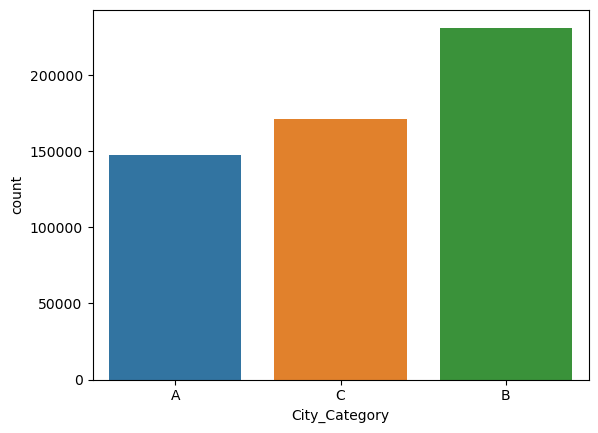

In [11]:
sns.countplot(x="City_Category",data=df)

# Preprocessing the dataset

In [12]:
# check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
# Droping column  
df=df.drop("Product_Category_3",axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969


In [14]:
# Filling null values 
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode().values[0]).astype("float32")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,7969


In [15]:
# Checking null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

# __Label Encoding__

In [16]:
# encoding values using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,8.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,8.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,8.0,7969


In [17]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,8.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,8.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,8.0,7969


# Input Split

In [18]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])  
y = df['Purchase']

# Model Training

In [19]:
from sklearn.linear_model import LinearRegression 


In [20]:
model = LinearRegression()

In [21]:
# Splitting the dataset into training and testing subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [22]:
# training ML model with input data
model.fit(x_train, y_train)

LinearRegression()

In [23]:
# getting Intercept and coefficient of our model
print(model.intercept_)
print(model.coef_)

10843.820407132402
[ 517.43929483  118.36871121    6.00416126  354.01415435    7.72119067
  -55.72543364 -423.31736015  -41.7743522 ]


In [25]:
# predicting purchase amount 
model.predict(x_test)

array([8866.80336316, 9719.90161491, 7385.5578052 , ..., 9576.20158563,
       7185.20680325, 9640.89733443])

In [26]:
model.predict([[0,0,10,0,2,0,3,8.0]])

array([9315.157503])

# Conclusion

<Axes: title={'center': 'Model Coefficients'}>

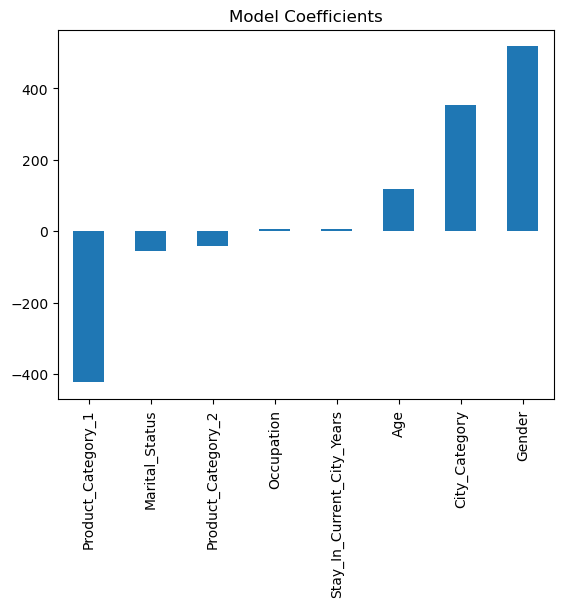

In [24]:
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

From This bar-graph we conclude that Age, City_Category and Gender are mostly important to predict the purchase amount.
& Product_Category_1, Product_Category_2 & Maritial_Status can be ignored